In [1]:
import pandas as pd

# Cargar el archivo de Excel
file_path = "C:/Users/rodri/Documents/8SEMESTRE/ANALITICA/Proyecto 3/Datos_nariño.csv"
df = pd.read_csv(file_path)

# Ver las primeras filas para inspeccionar
print(df.head())
print(df.info())  # Verificar tipos de datos y valores nulos


  cole_area_ubicacion cole_bilingue cole_calendario      cole_caracter  \
0              URBANO             N               A  TÉCNICO/ACADÉMICO   
1              URBANO             N               A  TÉCNICO/ACADÉMICO   
2              URBANO             N               A  TÉCNICO/ACADÉMICO   
3              URBANO             N               A          ACADÉMICO   
4              URBANO             N               A          ACADÉMICO   

  cole_depto_ubicacion cole_genero cole_jornada estu_privado_libertad  \
0               NARIÑO       MIXTO       MAÑANA                     N   
1               NARIÑO       MIXTO       MAÑANA                     N   
2               NARIÑO    FEMENINO       MAÑANA                     N   
3               NARIÑO    FEMENINO       MAÑANA                     N   
4               NARIÑO       MIXTO       MAÑANA                     N   

   fami_educacionmadre                 fami_educacionpadre fami_personashogar  \
0  Primaria incompleta             

In [2]:
# Verificar cuántos valores faltantes hay en cada columna
print(df.isnull().sum())


cole_area_ubicacion         17
cole_bilingue            20802
cole_calendario              0
cole_caracter             4072
cole_depto_ubicacion         0
cole_genero                  0
cole_jornada                 0
estu_privado_libertad        0
fami_educacionmadre      11628
fami_educacionpadre      11493
fami_personashogar        5820
fami_tienecomputador      8103
fami_tieneinternet        8879
punt_global              83011
dtype: int64


In [3]:
# Identificar columnas numéricas y categóricas
columnas_numericas = df.select_dtypes(include=['number']).columns
columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns

# Reemplazar valores faltantes en columnas numéricas con 0
df[columnas_numericas] = df[columnas_numericas].fillna(0)

# Reemplazar valores faltantes en columnas categóricas con "Sin dato"
df[columnas_categoricas] = df[columnas_categoricas].fillna("Sin dato")


In [4]:
# Eliminar filas con valores nulos
df = df.dropna()

# Eliminar columnas con muchos valores nulos
df = df.dropna(axis=1)


In [5]:
# Eliminar filas duplicadas
df = df.drop_duplicates()


In [6]:
# Guardar el DataFrame limpio en un nuevo archivo CSV
df.to_csv("C:/Users/rodri/Documents/8SEMESTRE/ANALITICA/Proyecto 3/Datos_limpios_nariño.csv", index=False)


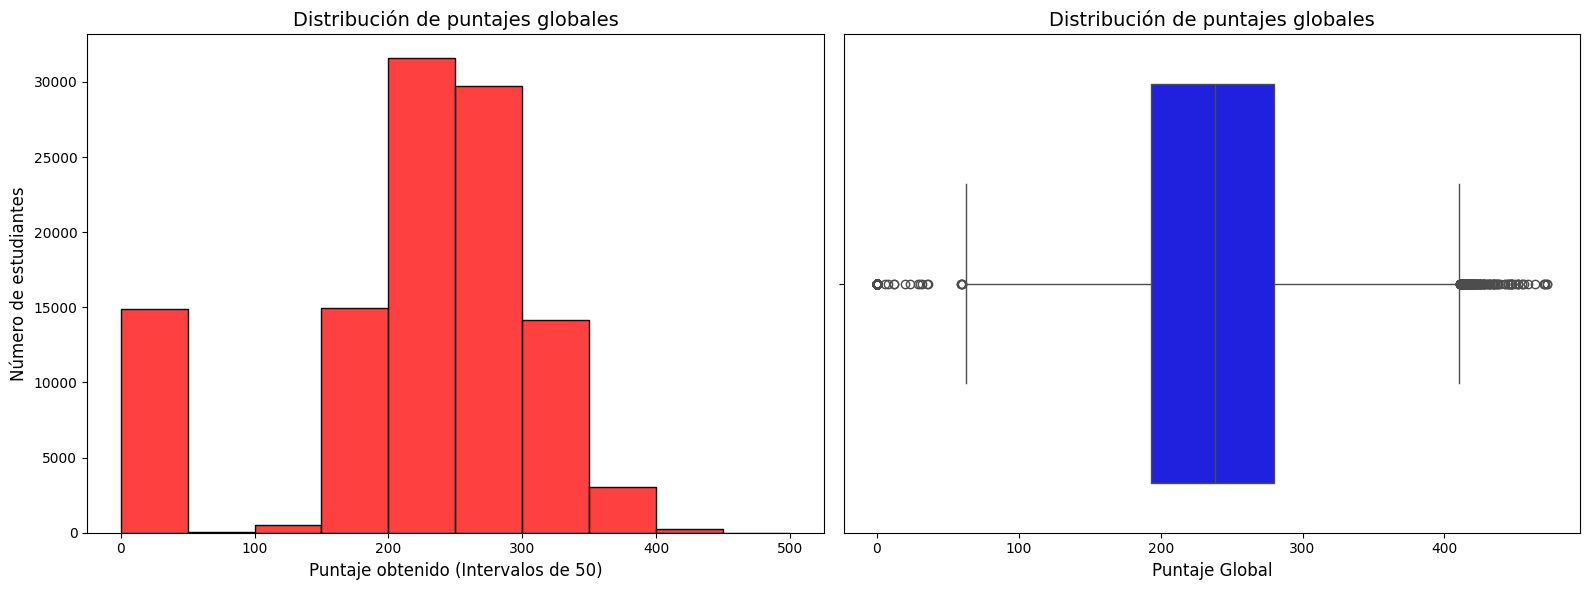

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV limpio
file_path = "C:/Users/rodri/Documents/8SEMESTRE/ANALITICA/Proyecto 3/Datos_limpios_nariño.csv"
df = pd.read_csv(file_path)

# Definir la columna del puntaje global
puntajes = df['punt_global']

# Crear las figuras para el histograma y el boxplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma: frecuencia de puntajes en intervalos de 50, con barras pegadas
sns.histplot(puntajes, bins=range(0, int(puntajes.max()) + 50, 50), ax=axes[0], color='red', edgecolor='black')
axes[0].set_title('Distribución de puntajes globales', fontsize=14)
axes[0].set_xlabel('Puntaje obtenido (Intervalos de 50)', fontsize=12)
axes[0].set_ylabel('Número de estudiantes', fontsize=12)

# Diagrama de cajas (boxplot) del puntaje global
sns.boxplot(x=puntajes, ax=axes[1], color='blue')
axes[1].set_title('Distribución de puntajes globales', fontsize=14)
axes[1].set_xlabel('Puntaje Global', fontsize=12)

# Ajustar el diseño para que las etiquetas no se superpongan
plt.tight_layout()
plt.show()




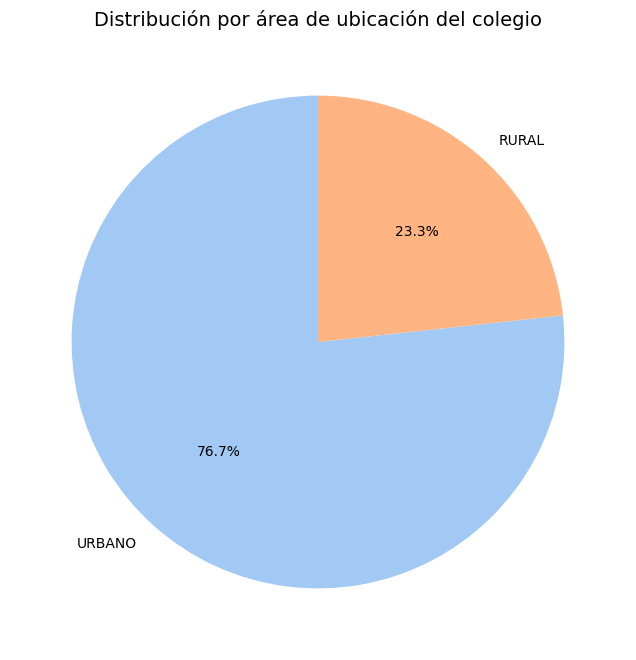

In [12]:
# Filtrar y eliminar los registros donde la columna 'cole_area_ubicacion' tenga "Sin dato"
df_filtrado = df[df['cole_area_ubicacion'] != 'Sin dato']

# Calcular la frecuencia de cada categoría en la columna 'cole_area_ubicacion' sin "Sin dato"
frecuencia_area = df_filtrado['cole_area_ubicacion'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(frecuencia_area, labels=frecuencia_area.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

# Agregar título
plt.title('Distribución por área de ubicación del colegio', fontsize=14)

# Mostrar el gráfico
plt.show()

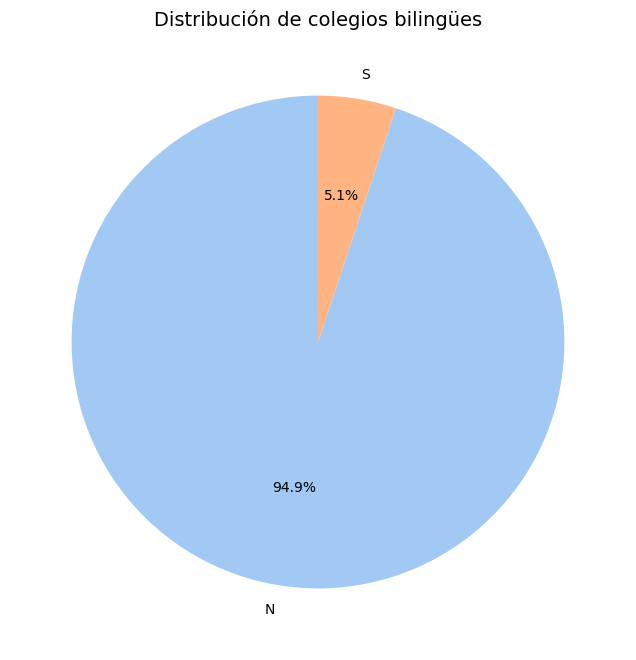

In [13]:
# Eliminar los registros donde 'cole_bilingue' tenga "Sin dato"
df_filtrado = df[df['cole_bilingue'] != 'Sin dato']

# Calcular la frecuencia de cada categoría en la columna 'cole_bilingue'
frecuencia_bilingue = df_filtrado['cole_bilingue'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(frecuencia_bilingue, labels=frecuencia_bilingue.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

# Agregar título
plt.title('Distribución de colegios bilingües', fontsize=14)

# Mostrar el gráfico
plt.show()

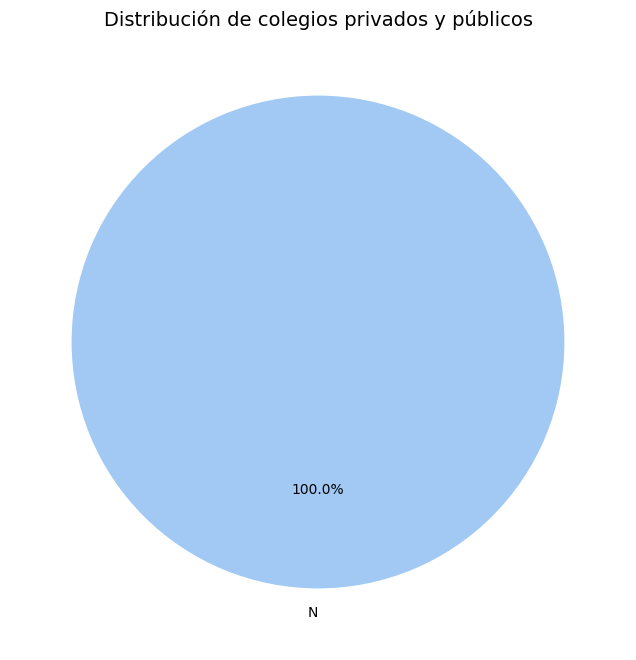

In [15]:
# Eliminar los registros donde 'estu_privado_libertad' tenga "Sin dato"
df_filtrado = df[df['estu_privado_libertad'] != 'Sin dato']

# Calcular la frecuencia de cada categoría en la columna 'estu_privado_libertad'
frecuencia_privado_libertad = df_filtrado['estu_privado_libertad'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(frecuencia_privado_libertad, labels=frecuencia_privado_libertad.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

# Agregar título
plt.title('Distribución de colegios privados y públicos', fontsize=14)

# Mostrar el gráfico
plt.show()

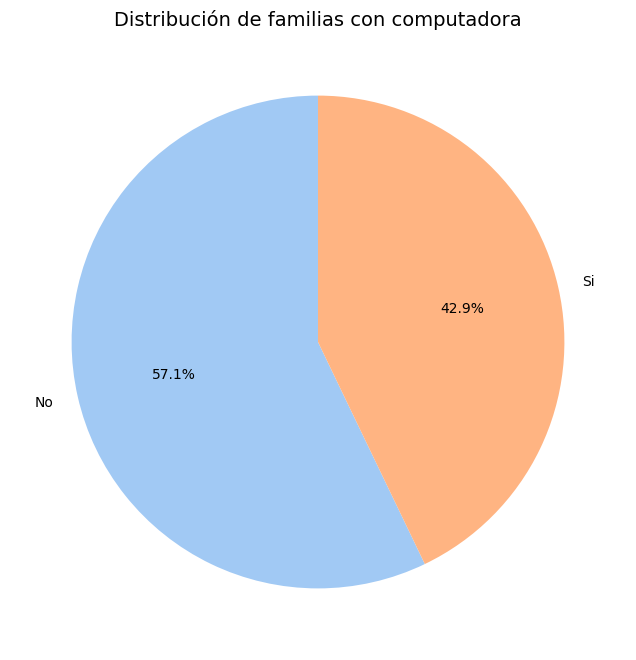

In [16]:
# Eliminar los registros donde 'fami_tienecomputador' tenga "Sin dato"
df_filtrado = df[df['fami_tienecomputador'] != 'Sin dato']

# Calcular la frecuencia de cada categoría en la columna 'fami_tienecomputador'
frecuencia_computador = df_filtrado['fami_tienecomputador'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(frecuencia_computador, labels=frecuencia_computador.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

# Agregar título
plt.title('Distribución de familias con computadora', fontsize=14)

# Mostrar el gráfico
plt.show()

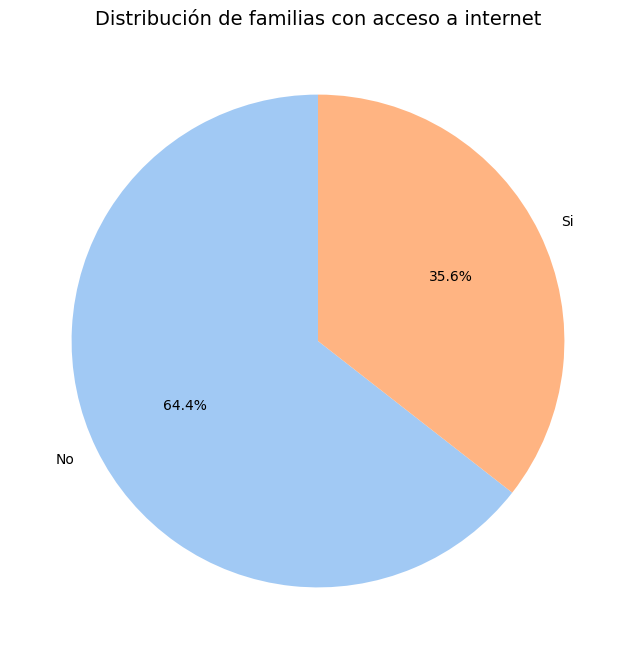

In [17]:
# Eliminar los registros donde 'fami_tieneinternet' tenga "Sin dato"
df_filtrado = df[df['fami_tieneinternet'] != 'Sin dato']

# Calcular la frecuencia de cada categoría en la columna 'fami_tieneinternet'
frecuencia_internet = df_filtrado['fami_tieneinternet'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(frecuencia_internet, labels=frecuencia_internet.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

# Agregar título
plt.title('Distribución de familias con acceso a internet', fontsize=14)

# Mostrar el gráfico
plt.show()

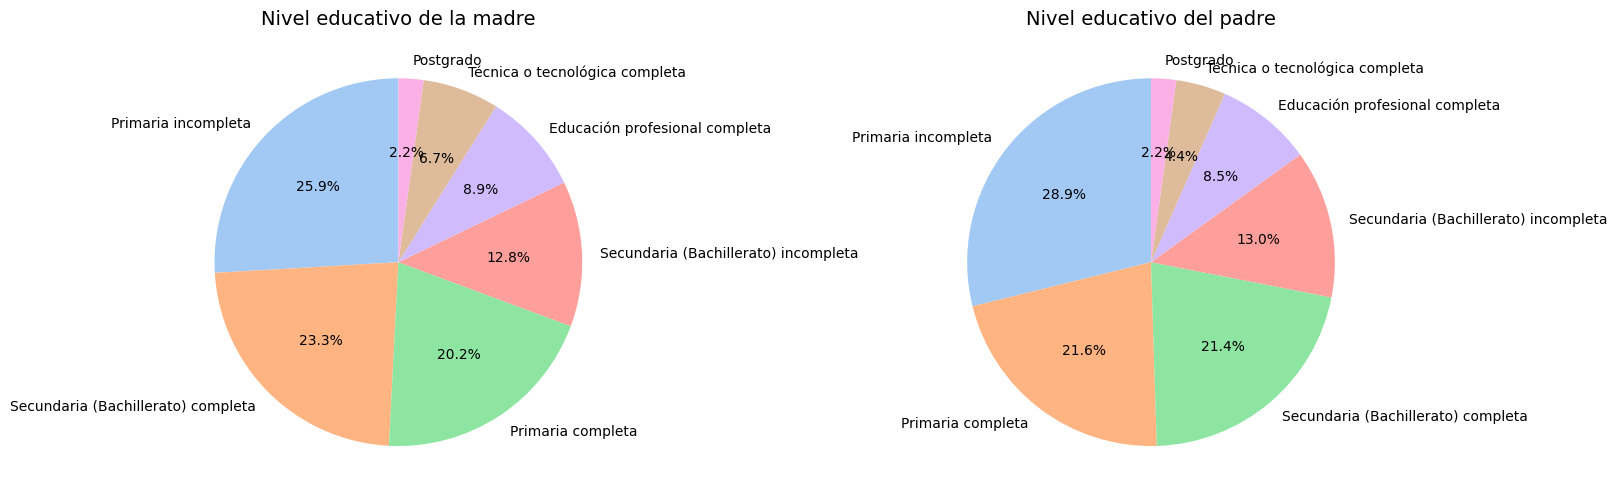

In [25]:
# Filtrar las categorías no deseadas para 'fami_educacionmadre' y 'fami_educacionpadre'
categorias_no_deseadas = ['Educación profesional incompleta', 'Ninguno', 'No Aplica', 'No sabe', 'Sin dato', "Técnica o tecnológica incompleta"]

# Filtrar los datos para eliminar las categorías no deseadas en ambas columnas
df_filtrado_madre = df[~df['fami_educacionmadre'].isin(categorias_no_deseadas)]
df_filtrado_padre = df[~df['fami_educacionpadre'].isin(categorias_no_deseadas)]

# Calcular la frecuencia de cada categoría para 'fami_educacionmadre' y 'fami_educacionpadre'
frecuencia_educacionmadre = df_filtrado_madre['fami_educacionmadre'].value_counts()
frecuencia_educacionpadre = df_filtrado_padre['fami_educacionpadre'].value_counts()

# Crear los gráficos de pastel para madre y padre en una sola figura
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico para 'fami_educacionmadre'
axes[0].pie(frecuencia_educacionmadre, labels=frecuencia_educacionmadre.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[0].set_title('Nivel educativo de la madre', fontsize=14)

# Gráfico para 'fami_educacionpadre'
axes[1].pie(frecuencia_educacionpadre, labels=frecuencia_educacionpadre.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[1].set_title('Nivel educativo del padre', fontsize=14)

# Ajustar el diseño para que las etiquetas no se superpongan
plt.tight_layout()

# Mostrar los gráficos
plt.show()

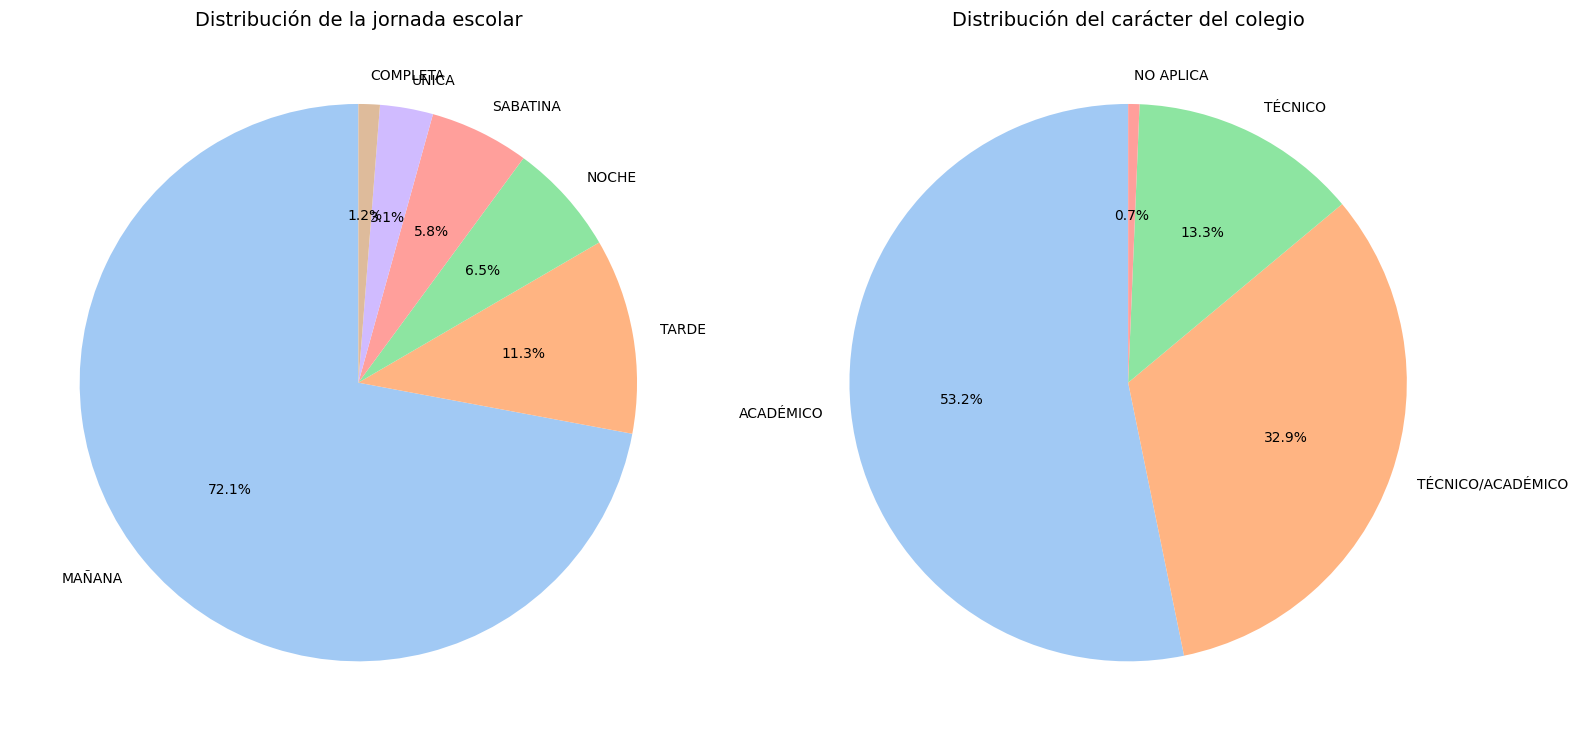

In [26]:
# Filtrar las categorías no deseadas para 'cole_jornada' y 'cole_caracter' si es necesario
categorias_no_deseadas_jornada = ['Sin dato']  # Agregar otras categorías si es necesario
categorias_no_deseadas_caracter = ['Sin dato']  # Agregar otras categorías si es necesario

# Filtrar los datos para eliminar las categorías no deseadas en ambas columnas
df_filtrado_jornada = df[~df['cole_jornada'].isin(categorias_no_deseadas_jornada)]
df_filtrado_caracter = df[~df['cole_caracter'].isin(categorias_no_deseadas_caracter)]

# Calcular la frecuencia de cada categoría para 'cole_jornada' y 'cole_caracter'
frecuencia_jornada = df_filtrado_jornada['cole_jornada'].value_counts()
frecuencia_caracter = df_filtrado_caracter['cole_caracter'].value_counts()

# Crear los gráficos de pastel para jornada y caracter en una sola figura
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico para 'cole_jornada'
axes[0].pie(frecuencia_jornada, labels=frecuencia_jornada.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[0].set_title('Distribución de la jornada escolar', fontsize=14)

# Gráfico para 'cole_caracter'
axes[1].pie(frecuencia_caracter, labels=frecuencia_caracter.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[1].set_title('Distribución del carácter del colegio', fontsize=14)

# Ajustar el diseño para que las etiquetas no se superpongan
plt.tight_layout()

# Mostrar los gráficos
plt.show()